In [2]:
import pandas as pd 
import os

In [3]:
repeat0 = 20
repeat1 = 4000

In [4]:
ld_script = r"""
/* Script for -z combreloc -z separate-code */
/* Copyright (C) 2014-2020 Free Software Foundation, Inc.
   Copying and distribution of this script, with or without modification,
   are permitted in any medium without royalty provided the copyright
   notice and this notice are preserved.  */
OUTPUT_FORMAT("elf64-x86-64", "elf64-x86-64",
	      "elf64-x86-64")
OUTPUT_ARCH(i386:x86-64)
ENTRY(_start)
SEARCH_DIR("=/usr/local/lib/x86_64-linux-gnu"); SEARCH_DIR("=/lib/x86_64-linux-gnu"); SEARCH_DIR("=/usr/lib/x86_64-linux-gnu"); SEARCH_DIR("=/usr/lib/x86_64-linux-gnu64"); SEARCH_DIR("=/usr/local/lib64"); SEARCH_DIR("=/lib64"); SEARCH_DIR("=/usr/lib64"); SEARCH_DIR("=/usr/local/lib"); SEARCH_DIR("=/lib"); SEARCH_DIR("=/usr/lib"); SEARCH_DIR("=/usr/x86_64-linux-gnu/lib64"); SEARCH_DIR("=/usr/x86_64-linux-gnu/lib");
SECTIONS
{
  PROVIDE (__executable_start = SEGMENT_START("text-segment", 0x400000)); . = SEGMENT_START("text-segment", 0x400000) + SIZEOF_HEADERS;
  .interp         : { *(.interp) }
  .note.gnu.build-id  : { *(.note.gnu.build-id) }
  .hash           : { *(.hash) }
  .gnu.hash       : { *(.gnu.hash) }
  .dynsym         : { *(.dynsym) }
  .dynstr         : { *(.dynstr) }
  .gnu.version    : { *(.gnu.version) }
  .gnu.version_d  : { *(.gnu.version_d) }
  .gnu.version_r  : { *(.gnu.version_r) }
  .rela.dyn       :
    {
      *(.rela.init)
      *(.rela.text .rela.text.* .rela.gnu.linkonce.t.*)
      *(.rela.fini)
      *(.rela.rodata .rela.rodata.* .rela.gnu.linkonce.r.*)
      *(.rela.data .rela.data.* .rela.gnu.linkonce.d.*)
      *(.rela.tdata .rela.tdata.* .rela.gnu.linkonce.td.*)
      *(.rela.tbss .rela.tbss.* .rela.gnu.linkonce.tb.*)
      *(.rela.ctors)
      *(.rela.dtors)
      *(.rela.got)
      *(.rela.bss .rela.bss.* .rela.gnu.linkonce.b.*)
      *(.rela.ldata .rela.ldata.* .rela.gnu.linkonce.l.*)
      *(.rela.lbss .rela.lbss.* .rela.gnu.linkonce.lb.*)
      *(.rela.lrodata .rela.lrodata.* .rela.gnu.linkonce.lr.*)
      *(.rela.ifunc)
    }
  .rela.plt       :
    {
      *(.rela.plt)
      PROVIDE_HIDDEN (__rela_iplt_start = .);
      *(.rela.iplt)
      PROVIDE_HIDDEN (__rela_iplt_end = .);
    }
  . = ALIGN(CONSTANT (MAXPAGESIZE));
  .init           :
  {
    KEEP (*(SORT_NONE(.init)))
  }
  .plt            : { *(.plt) *(.iplt) }
.plt.got        : { *(.plt.got) }
.plt.sec        : { *(.plt.sec) }
  . = 0x40000000;
  .text           :
  {
    b64.o (.text .stub .text.* .gnu.linkonce.t.*)
    *(.text.unlikely .text.*_unlikely .text.unlikely.*)
    *(.text.exit .text.exit.*)
    *(.text.startup .text.startup.*)
    *(.text.hot .text.hot.*)
    *(SORT(.text.sorted.*))
    a64.o (.text .stub .text.* .gnu.linkonce.t.*)
    /* .gnu.warning sections are handled specially by elf.em.  */
    *(.gnu.warning)
  }
  .fini           :
  {
    KEEP (*(SORT_NONE(.fini)))
  }
  PROVIDE (__etext = .);
  PROVIDE (_etext = .);
  PROVIDE (etext = .);
  . = ALIGN(CONSTANT (MAXPAGESIZE));
  /* Adjust the address for the rodata segment.  We want to adjust up to
     the same address within the page on the next page up.  */
  . = SEGMENT_START("rodata-segment", ALIGN(CONSTANT (MAXPAGESIZE)) + (. & (CONSTANT (MAXPAGESIZE) - 1)));
  .rodata         : { *(.rodata .rodata.* .gnu.linkonce.r.*) }
  .rodata1        : { *(.rodata1) }
  .eh_frame_hdr   : { *(.eh_frame_hdr) *(.eh_frame_entry .eh_frame_entry.*) }
  .eh_frame       : ONLY_IF_RO { KEEP (*(.eh_frame)) *(.eh_frame.*) }
  .gcc_except_table   : ONLY_IF_RO { *(.gcc_except_table .gcc_except_table.*) }
  .gnu_extab   : ONLY_IF_RO { *(.gnu_extab*) }
  /* These sections are generated by the Sun/Oracle C++ compiler.  */
  .exception_ranges   : ONLY_IF_RO { *(.exception_ranges*) }
  /* Adjust the address for the data segment.  We want to adjust up to
     the same address within the page on the next page up.  */
  . = DATA_SEGMENT_ALIGN (CONSTANT (MAXPAGESIZE), CONSTANT (COMMONPAGESIZE));
  /* Exception handling  */
  .eh_frame       : ONLY_IF_RW { KEEP (*(.eh_frame)) *(.eh_frame.*) }
  .gnu_extab      : ONLY_IF_RW { *(.gnu_extab) }
  .gcc_except_table   : ONLY_IF_RW { *(.gcc_except_table .gcc_except_table.*) }
  .exception_ranges   : ONLY_IF_RW { *(.exception_ranges*) }
  /* Thread Local Storage sections  */
  .tdata	  :
   {
     PROVIDE_HIDDEN (__tdata_start = .);
     *(.tdata .tdata.* .gnu.linkonce.td.*)
   }
  .tbss		  : { *(.tbss .tbss.* .gnu.linkonce.tb.*) *(.tcommon) }
  .preinit_array    :
  {
    PROVIDE_HIDDEN (__preinit_array_start = .);
    KEEP (*(.preinit_array))
    PROVIDE_HIDDEN (__preinit_array_end = .);
  }
  .init_array    :
  {
    PROVIDE_HIDDEN (__init_array_start = .);
    KEEP (*(SORT_BY_INIT_PRIORITY(.init_array.*) SORT_BY_INIT_PRIORITY(.ctors.*)))
    KEEP (*(.init_array EXCLUDE_FILE (*crtbegin.o *crtbegin?.o *crtend.o *crtend?.o ) .ctors))
    PROVIDE_HIDDEN (__init_array_end = .);
  }
  .fini_array    :
  {
    PROVIDE_HIDDEN (__fini_array_start = .);
    KEEP (*(SORT_BY_INIT_PRIORITY(.fini_array.*) SORT_BY_INIT_PRIORITY(.dtors.*)))
    KEEP (*(.fini_array EXCLUDE_FILE (*crtbegin.o *crtbegin?.o *crtend.o *crtend?.o ) .dtors))
    PROVIDE_HIDDEN (__fini_array_end = .);
  }
  .ctors          :
  {
    /* gcc uses crtbegin.o to find the start of
       the constructors, so we make sure it is
       first.  Because this is a wildcard, it
       doesn't matter if the user does not
       actually link against crtbegin.o; the
       linker won't look for a file to match a
       wildcard.  The wildcard also means that it
       doesn't matter which directory crtbegin.o
       is in.  */
    KEEP (*crtbegin.o(.ctors))
    KEEP (*crtbegin?.o(.ctors))
    /* We don't want to include the .ctor section from
       the crtend.o file until after the sorted ctors.
       The .ctor section from the crtend file contains the
       end of ctors marker and it must be last */
    KEEP (*(EXCLUDE_FILE (*crtend.o *crtend?.o ) .ctors))
    KEEP (*(SORT(.ctors.*)))
    KEEP (*(.ctors))
  }
  .dtors          :
  {
    KEEP (*crtbegin.o(.dtors))
    KEEP (*crtbegin?.o(.dtors))
    KEEP (*(EXCLUDE_FILE (*crtend.o *crtend?.o ) .dtors))
    KEEP (*(SORT(.dtors.*)))
    KEEP (*(.dtors))
  }
  .jcr            : { KEEP (*(.jcr)) }
  .data.rel.ro : { *(.data.rel.ro.local* .gnu.linkonce.d.rel.ro.local.*) *(.data.rel.ro .data.rel.ro.* .gnu.linkonce.d.rel.ro.*) }
  .dynamic        : { *(.dynamic) }
  .got            : { *(.got) *(.igot) }
  . = DATA_SEGMENT_RELRO_END (SIZEOF (.got.plt) >= 24 ? 24 : 0, .);
  .got.plt        : { *(.got.plt) *(.igot.plt) }
  .data           :
  {
    *(.data .data.* .gnu.linkonce.d.*)
    SORT(CONSTRUCTORS)
  }
  .data1          : { *(.data1) }
  _edata = .; PROVIDE (edata = .);
  . = .;
  __bss_start = .;
  .bss            :
  {
   *(.dynbss)
   *(.bss .bss.* .gnu.linkonce.b.*)
   *(COMMON)
   /* Align here to ensure that the .bss section occupies space up to
      _end.  Align after .bss to ensure correct alignment even if the
      .bss section disappears because there are no input sections.
      FIXME: Why do we need it? When there is no .bss section, we do not
      pad the .data section.  */
   . = ALIGN(. != 0 ? 64 / 8 : 1);
  }
  .lbss   :
  {
    *(.dynlbss)
    *(.lbss .lbss.* .gnu.linkonce.lb.*)
    *(LARGE_COMMON)
  }
  . = ALIGN(64 / 8);
  . = SEGMENT_START("ldata-segment", .);
  .lrodata   ALIGN(CONSTANT (MAXPAGESIZE)) + (. & (CONSTANT (MAXPAGESIZE) - 1)) :
  {
    *(.lrodata .lrodata.* .gnu.linkonce.lr.*)
  }
  .ldata   ALIGN(CONSTANT (MAXPAGESIZE)) + (. & (CONSTANT (MAXPAGESIZE) - 1)) :
  {
    *(.ldata .ldata.* .gnu.linkonce.l.*)
    . = ALIGN(. != 0 ? 64 / 8 : 1);
  }
  . = ALIGN(64 / 8);
  _end = .; PROVIDE (end = .);
  . = DATA_SEGMENT_END (.);
  /* Stabs debugging sections.  */
  .stab          0 : { *(.stab) }
  .stabstr       0 : { *(.stabstr) }
  .stab.excl     0 : { *(.stab.excl) }
  .stab.exclstr  0 : { *(.stab.exclstr) }
  .stab.index    0 : { *(.stab.index) }
  .stab.indexstr 0 : { *(.stab.indexstr) }
  .comment       0 : { *(.comment) }
  .gnu.build.attributes : { *(.gnu.build.attributes .gnu.build.attributes.*) }
  /* DWARF debug sections.
     Symbols in the DWARF debugging sections are relative to the beginning
     of the section so we begin them at 0.  */
  /* DWARF 1 */
  .debug          0 : { *(.debug) }
  .line           0 : { *(.line) }
  /* GNU DWARF 1 extensions */
  .debug_srcinfo  0 : { *(.debug_srcinfo) }
  .debug_sfnames  0 : { *(.debug_sfnames) }
  /* DWARF 1.1 and DWARF 2 */
  .debug_aranges  0 : { *(.debug_aranges) }
  .debug_pubnames 0 : { *(.debug_pubnames) }
  /* DWARF 2 */
  .debug_info     0 : { *(.debug_info .gnu.linkonce.wi.*) }
  .debug_abbrev   0 : { *(.debug_abbrev) }
  .debug_line     0 : { *(.debug_line .debug_line.* .debug_line_end) }
  .debug_frame    0 : { *(.debug_frame) }
  .debug_str      0 : { *(.debug_str) }
  .debug_loc      0 : { *(.debug_loc) }
  .debug_macinfo  0 : { *(.debug_macinfo) }
  /* SGI/MIPS DWARF 2 extensions */
  .debug_weaknames 0 : { *(.debug_weaknames) }
  .debug_funcnames 0 : { *(.debug_funcnames) }
  .debug_typenames 0 : { *(.debug_typenames) }
  .debug_varnames  0 : { *(.debug_varnames) }
  /* DWARF 3 */
  .debug_pubtypes 0 : { *(.debug_pubtypes) }
  .debug_ranges   0 : { *(.debug_ranges) }
  /* DWARF Extension.  */
  .debug_macro    0 : { *(.debug_macro) }
  .debug_addr     0 : { *(.debug_addr) }
  .gnu.attributes 0 : { KEEP (*(.gnu.attributes)) }
  /DISCARD/ : { *(.note.GNU-stack) *(.gnu_debuglink) *(.gnu.lto_*) }

"""

In [5]:
def create_ld(a, b):
  ld_new_sections = ''

  cnt = 59

  for i in range(cnt):
    ld_new_sections += f"""
    . = {hex(0x100000000 + i * 0x10000000)};
    .dummy_branch_{i} : {{ *(.dummy_branch_{i}) }}
  """

  ld_new_sections += f"""
    . = {hex(0x100000000 + cnt * 0x10000000 + (1 << a))};
    .dummy_branch_{cnt} : {{ *(.dummy_branch_{cnt}) }}
  """

  ld_new_sections += f"""
    . = {hex(0x100000000 + (cnt + 1) * 0x10000000 + (1 << b))};
    .dummy_branch_{cnt + 1} : {{ *(.dummy_branch_{cnt + 1}) }}
  """

  ld_new_sections += '}'

  with open("script.ld", "w") as file:
      file.write(ld_script + ld_new_sections)

In [11]:
# rdx 5
final_dfs = []
for i in range(2,21):
    final_df = pd.DataFrame()
    for j in range(2,21):
        create_ld(i, j)
        print(i, j)
        os.system("./run.sh {} {}".format(i, j))

        data = pd.read_csv("results.csv", comment='#', delim_whitespace=True)
        data["Clock"] = pd.to_numeric(data["Clock"],errors='coerce')
        data["BrRetired"] = pd.to_numeric(data["BrRetired"],errors='coerce')
        data["BrMispred"] = pd.to_numeric(data["BrMispred"],errors='coerce')
        data["Clock"] = (data["Clock"]) / repeat1
        data["BrRetired"] = data["BrRetired"] / repeat1
        data["BrMispred"] = data["BrMispred"] / repeat1
        final_df[j] = data.groupby(data.index // repeat0).mean()["BrMispred"]
    final_dfs.append(final_df)

2 2
Experiment date and time: Thu 25 Jan 2024 01:38:38 PM EST
2 3
Experiment date and time: Thu 25 Jan 2024 01:38:46 PM EST
2 4
Experiment date and time: Thu 25 Jan 2024 01:38:54 PM EST
2 5
Experiment date and time: Thu 25 Jan 2024 01:39:02 PM EST
2 6
Experiment date and time: Thu 25 Jan 2024 01:39:10 PM EST
2 7
Experiment date and time: Thu 25 Jan 2024 01:39:18 PM EST
2 8
Experiment date and time: Thu 25 Jan 2024 01:39:26 PM EST
2 9
Experiment date and time: Thu 25 Jan 2024 01:39:34 PM EST
2 10
Experiment date and time: Thu 25 Jan 2024 01:39:42 PM EST
2 11
Experiment date and time: Thu 25 Jan 2024 01:39:50 PM EST
2 12
Experiment date and time: Thu 25 Jan 2024 01:39:58 PM EST
2 13
Experiment date and time: Thu 25 Jan 2024 01:40:06 PM EST
2 14
Experiment date and time: Thu 25 Jan 2024 01:40:14 PM EST
2 15
Experiment date and time: Thu 25 Jan 2024 01:40:22 PM EST
2 16
Experiment date and time: Thu 25 Jan 2024 01:40:30 PM EST
2 17
Experiment date and time: Thu 25 Jan 2024 01:40:38 PM EST


In [8]:
for i, df in enumerate(final_dfs, 2):
    df.plot(title="{}".format(i))
    df.to_pickle('./script5/{}.pkl'.format(i))

NameError: name 'final_dfs' is not defined

In [6]:
# rdx 5
final_dfs2 = []
for i in range(2,27):
    final_df2 = pd.DataFrame()
    for j in range(2,27):
        create_ld(i, j)
        print(i, j)
        os.system("./run.sh {} {}".format(i, j))

        data = pd.read_csv("results.csv", comment='#', delim_whitespace=True)
        data["Clock"] = pd.to_numeric(data["Clock"],errors='coerce')
        data["BrRetired"] = pd.to_numeric(data["BrRetired"],errors='coerce')
        data["BrMispred"] = pd.to_numeric(data["BrMispred"],errors='coerce')
        data["Clock"] = (data["Clock"]) / repeat1
        data["BrRetired"] = data["BrRetired"] / repeat1
        data["BrMispred"] = data["BrMispred"] / repeat1
        final_df2[j] = data.groupby(data.index // repeat0).mean()["BrMispred"]
    final_dfs2.append(final_df2)

2 2
Experiment date and time: Thu 25 Jan 2024 03:22:12 PM EST
2 3
Experiment date and time: Thu 25 Jan 2024 03:22:20 PM EST
2 4
Experiment date and time: Thu 25 Jan 2024 03:22:28 PM EST
2 5
Experiment date and time: Thu 25 Jan 2024 03:22:36 PM EST
2 6
Experiment date and time: Thu 25 Jan 2024 03:22:44 PM EST
2 7
Experiment date and time: Thu 25 Jan 2024 03:22:52 PM EST
2 8
Experiment date and time: Thu 25 Jan 2024 03:23:00 PM EST
2 9
Experiment date and time: Thu 25 Jan 2024 03:23:08 PM EST
2 10
Experiment date and time: Thu 25 Jan 2024 03:23:16 PM EST
2 11
Experiment date and time: Thu 25 Jan 2024 03:23:24 PM EST
2 12
Experiment date and time: Thu 25 Jan 2024 03:23:32 PM EST
2 13
Experiment date and time: Thu 25 Jan 2024 03:23:40 PM EST
2 14
Experiment date and time: Thu 25 Jan 2024 03:23:47 PM EST
2 15
Experiment date and time: Thu 25 Jan 2024 03:23:55 PM EST
2 16
Experiment date and time: Thu 25 Jan 2024 03:24:03 PM EST
2 17
Experiment date and time: Thu 25 Jan 2024 03:24:11 PM EST


/home/jiayan/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


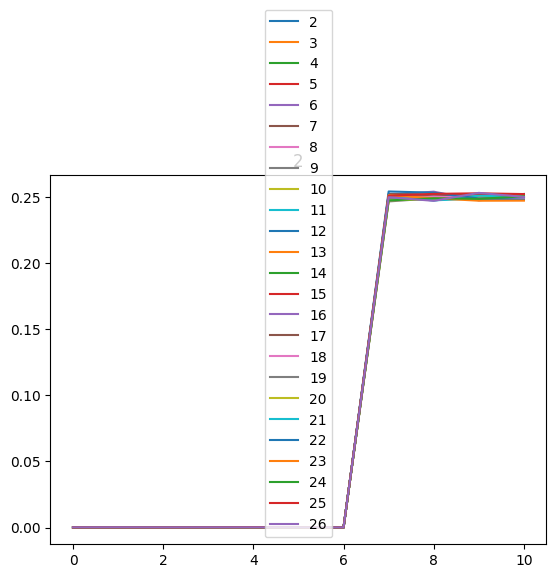

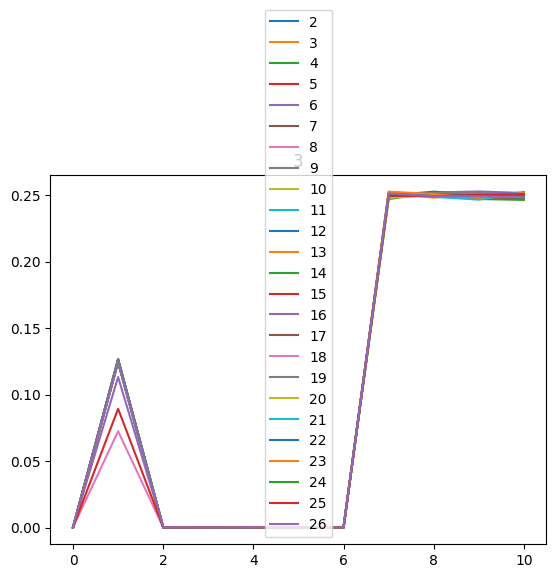

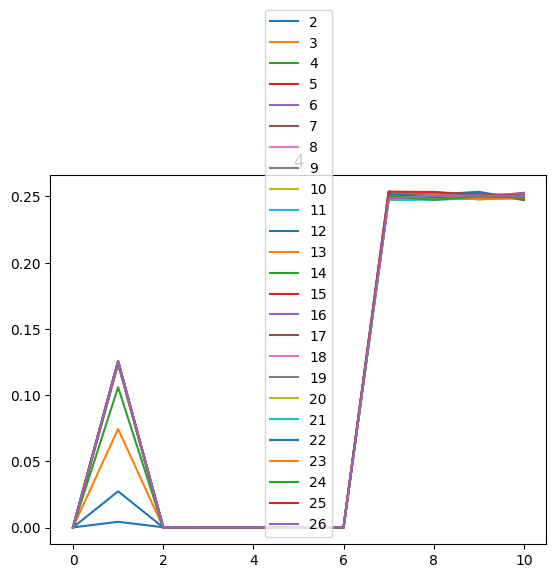

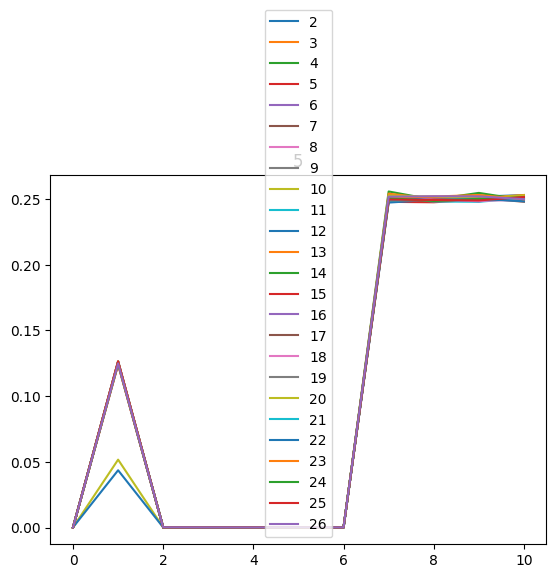

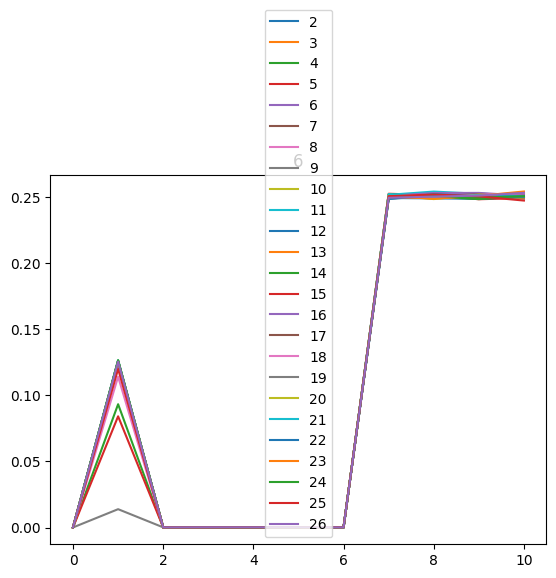

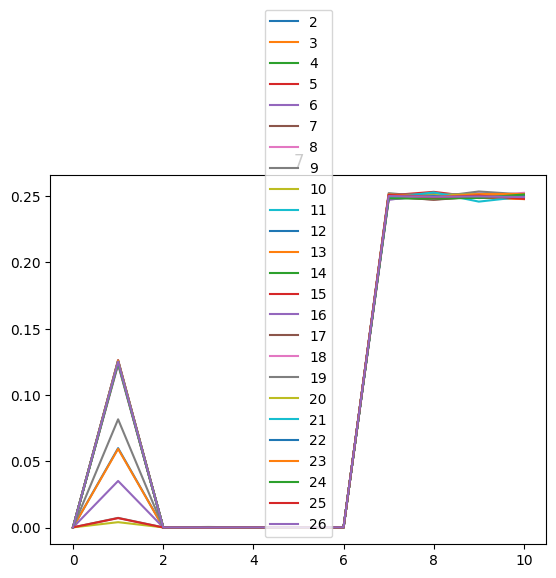

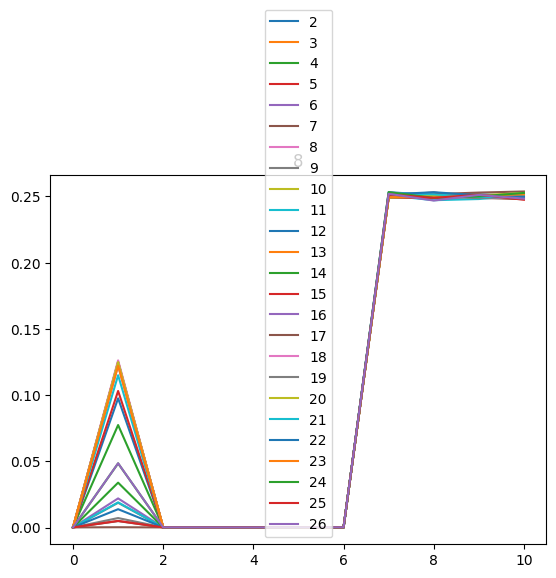

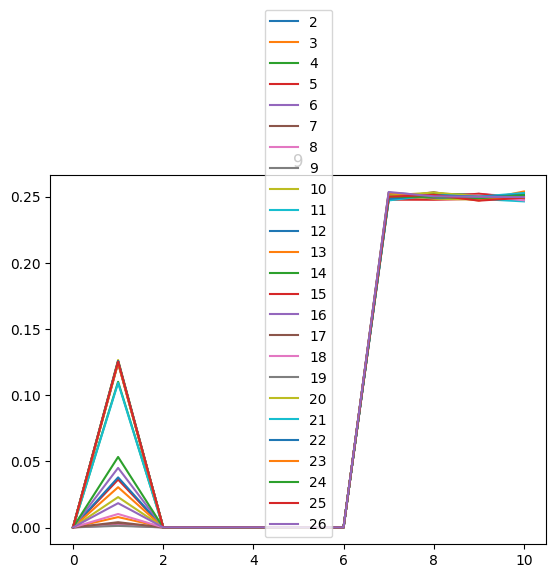

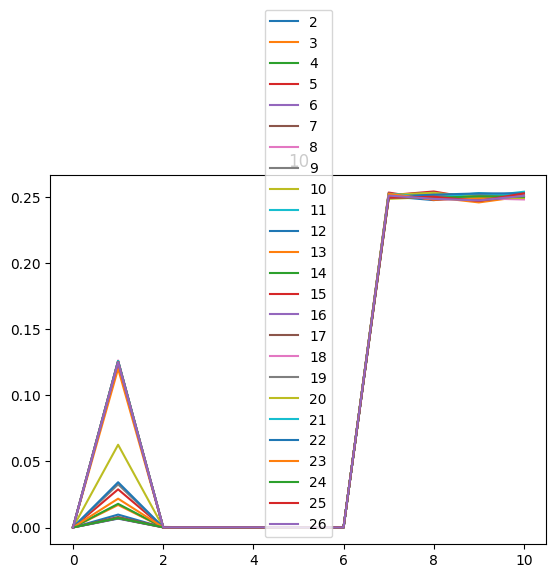

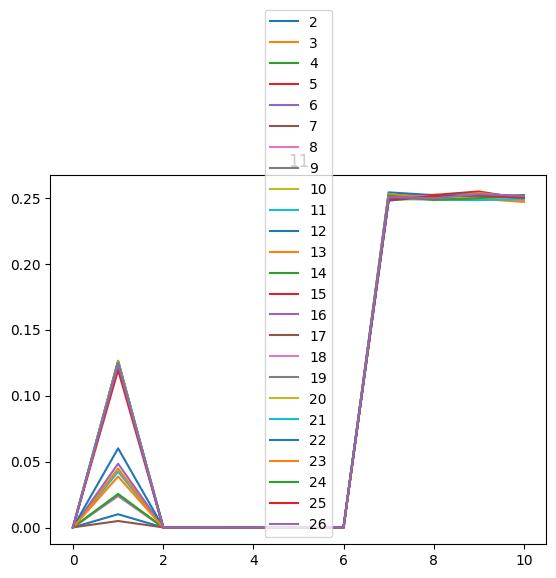

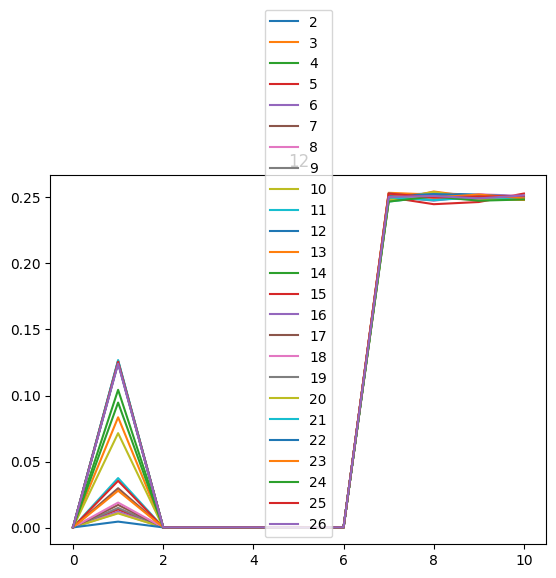

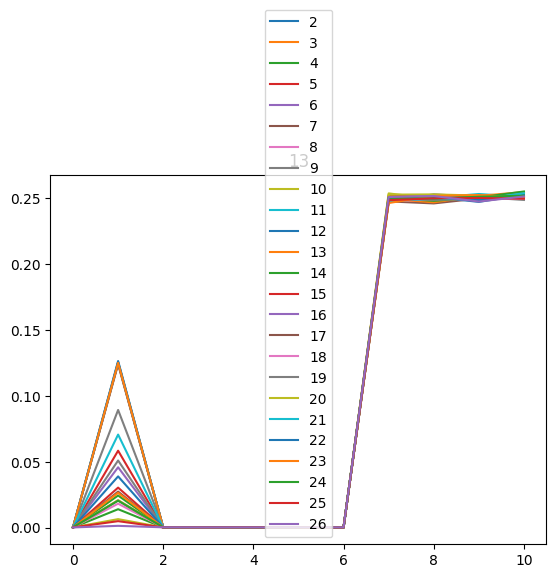

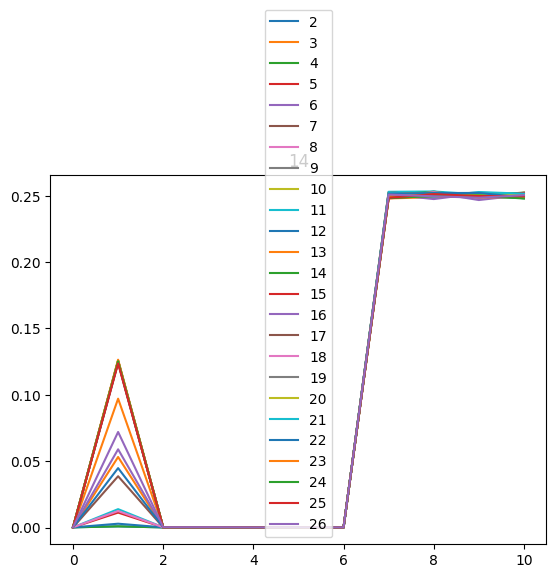

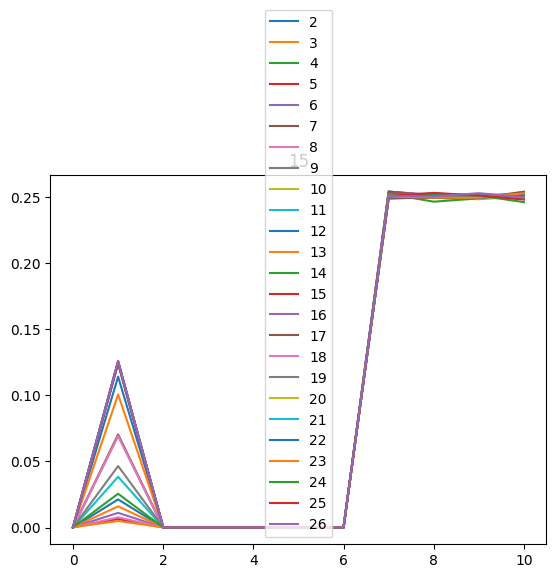

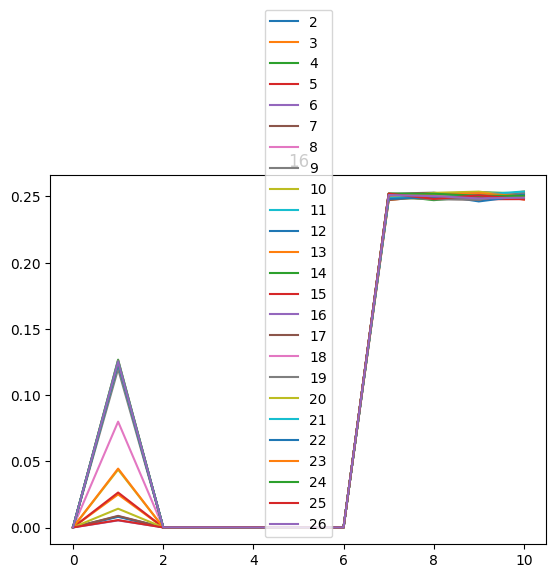

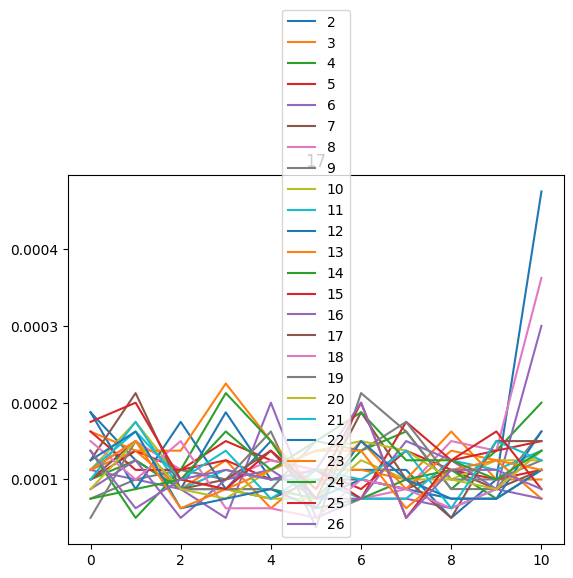

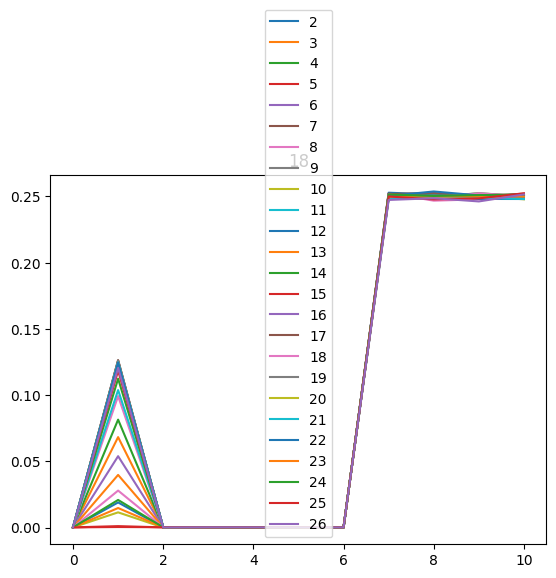

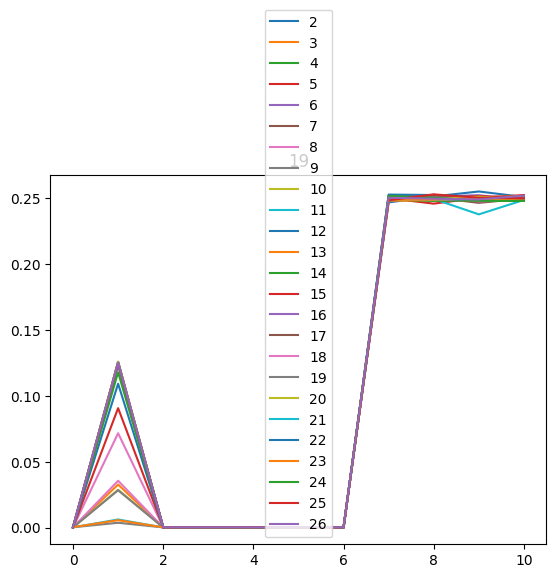

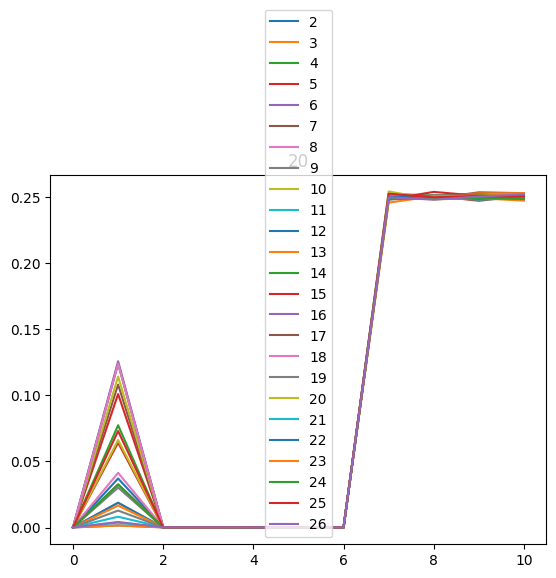

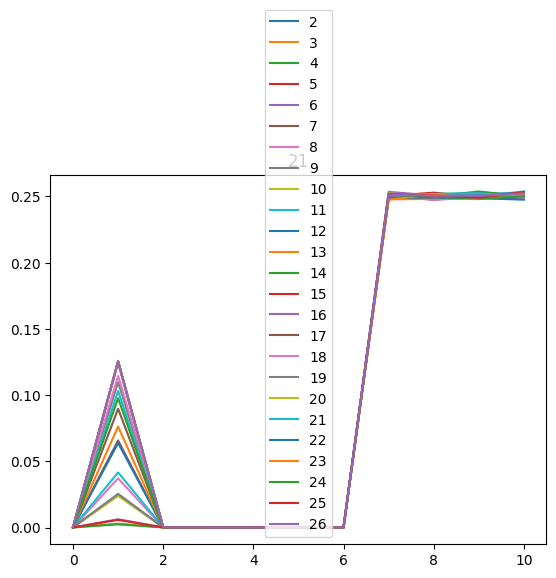

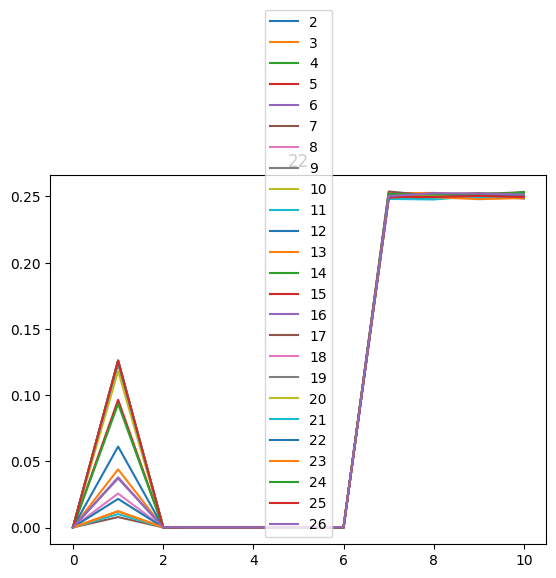

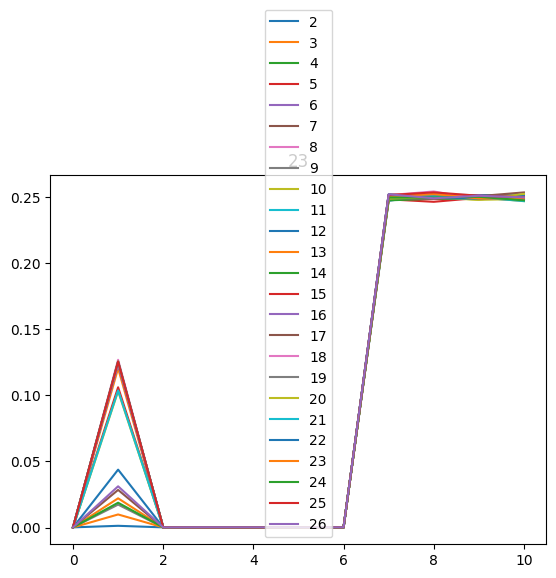

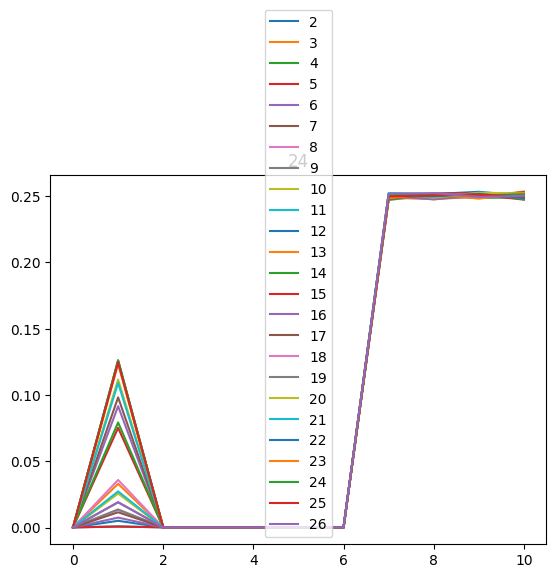

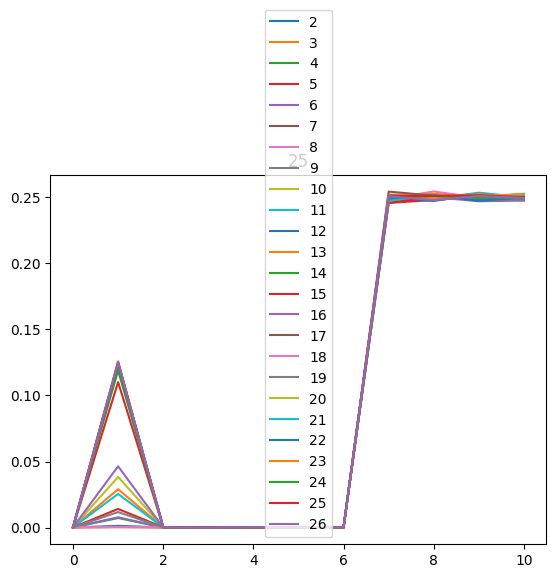

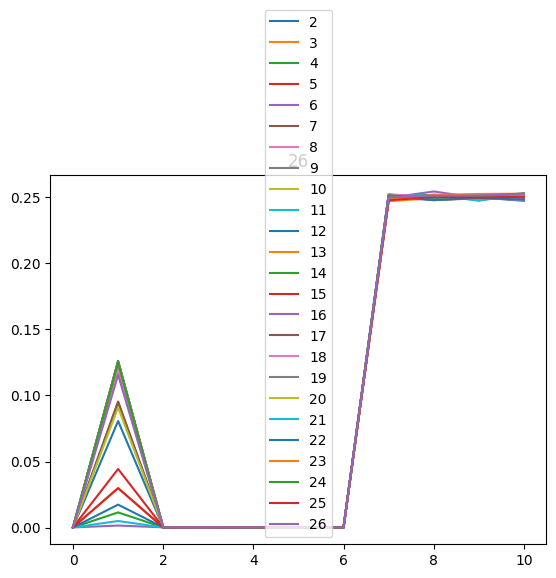

In [10]:
for i, df in enumerate(final_dfs2, 2):
    df.plot(title="{}".format(i))
    df.to_pickle('./script5/{}.pkl'.format(i))